## Exploratory Data Analysis
by [Gaurang  Acharekar](https://www.linkedin.com/in/gaurang-acharekar/)<br>



Dataset : [Pokemon stats](https://www.kaggle.com/abcsds/pokemon)

---


Hi everyone!
I'm still new to data analysis, but I'm excited to learn and improve. The Pokémon dataset is a fun and beginner‑friendly choice, and I’ve tried to present my findings as clearly as possible. I hope you find my analysis helpful.

## **Technical Skill Summary**

This project demonstrates a full‑cycle Data Science workflow, including:

- **Data Wrangling:**  
  Cleaned 800+ entries using Pandas, handled missing dual‑typing, and processed Mega Evolution naming.

- **Feature Engineering:**  
  Created custom metrics such as the **Power‑to‑Speed Ratio** to measure combat efficiency beyond raw totals.

- **Statistical Analysis:**  
  Conducted hypothesis testing (Independent T‑Tests) to validate the significance of Legendary status (\(p < 0.05\)).

- **Advanced Visualization:**  
  Used Seaborn and Matplotlib for distribution analysis (Boxen/Violin plots), correlation mapping (masked heatmaps), and outlier detection.



**Table of Contents**
1. [ Basic Analysis](#1)
   * [ Data Cleaning & Pre-processing](#2)
   * [ Type Distribution Summary](#3)
   * [ The Strongest and The Weakest](#4)
   * [ The Fastest and The Slowest](#5)
   * [ Statistical Summary](#6)
2. [ Data Visualisation](#7)
   * [ Count Plot: Distribution of Types](#8)
   * [ Pie Plot: Legendary vs Non-Legendary](#9)
   * [ Box Plot and Violin Plot: Stat Spreads](#10)
   * [ Swarm Plot: Type-wise Performance](#11)
   * [ Heat Map: Attribute Correlation](#12)
3. [ Advanced Analytics](#13)
   * [ Feature Engineering: Power-to-Speed Ratios](#14)
   * [ Outlier Detection: Identifying Stat Extremes](#15)
   * [ Hypothesis Testing: The Legendary Advantage](#16)
4. [ Key Insights & Conclusion](#17)
   * [ Summary of Findings](#18)
   * [ Final Thoughts: The TL:DR](#19)


<a id="1"></a>

# **Basic Analysis**




In [2]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
from scipy import stats
%matplotlib inline

In [3]:
#Input Data
data = pd.read_csv("Pokemon.csv") #reading csv file and save it into a variable
data.head(10) #show the first 10 rows in data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


We finally know that our data has 12 columns.
* *Name*       : Nominal data
* *Type 1*     : Nominal data
* *Type 2*     : Nominal data
* *Total *     : Ratio data
* *HP *        : Ratio data
* *Attack*     : Ratio data
* *Defense*    : Ratio data
* *Sp Atk*     : Ratio data
* *Sp Def*     : Ratio data
* *Speed*      : Ratio data
* *Generation* : Ordinal data
* *Legendary*  : Nominal data


---

<a id="2"></a>

## **1.1 Data Cleaning**

Some entries in the `Name` column contain unnecessary prefixes. For example:

- `"CharizardMega Charizard X"` should be cleaned to `"Mega Charizard X"`

To standardize these names, all characters appearing **before the word “Mega”** are removed. This ensures consistent naming across all Mega‑form Pokémon and prevents downstream issues during grouping, filtering, or visualization.

---



In [4]:
data.Name = data.Name.str.replace(".*(?=Mega)", "")
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [5]:
data = data.set_index('Name') #change and set the index to the name attribute
data = data.drop(['#'],axis=1) #drop the columns with axis=1; axis=0 is for rows
data.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


---

If we examine row 5, we notice a missing value (`NaN`) in the *Type 2* column. While one option is to delete rows containing `NaN`, doing so would disrupt the integrity of our dataset by removing valid Pokémon entries.

Instead, we’ll choose a safer approach: **fill missing values in the *Type 2* column by copying the corresponding value from *Type 1***. This preserves all rows and ensures that each Pokémon has a complete type profile.

---


In [6]:
data = data.fillna({'Type 2': data['Type 1']})
data.head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False



<a id="3"></a>

## **1.2 Type Distribution Summary**

---



In [7]:
print("Type 1:",data["Type 1"].unique(), "=", len(data["Type 1"].unique()))
print("Type 2:",data["Type 2"].unique(), "=", len(data["Type 2"].unique()))

Type 1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying'] = 18
Type 2: ['Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal' 'Electric'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark'
 'Ghost'] = 18


This reveals that there are 18 unique types in both columns:

Next, we’ll use value_counts() to quantify how frequently each type appears in both columns:


In [8]:
print(data["Type 1"].value_counts())
print(data["Type 2"].value_counts())

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64
Type 2
Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: count, dtype: int64


From the frequency counts, we can conclude that **Water** appears most often in *Type 1*, while **Flying** is the most common in *Type 2*.  
Conversely, the least frequent type in *Type 1* is **Flying**, and in *Type 2* the rarest type is **Bug**.


---

<a id="4"></a>

## **1.3 Evaluating the Strongest and Weakest Pokémon Across All Types**

**Ever wondered which Pokémon are the strongest and weakest within each type?**  
This section breaks down type‑specific performance by comparing total base stats across all primary types, helping us identify both dominant powerhouses and surprising underperformers.

---





In [9]:
strongest = data.sort_values(by='Total', ascending=False)  # Sort Pokémon by total stats from highest to lowest
strongest.drop_duplicates(subset=['Type 1'], keep='first')
# After sorting, the first occurrence of each Type 1 represents the top‑stat Pokémon of that type
# Dropping duplicates keeps only that strongest Pokémon for every primary type

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


Based on our analysis, we identified the strongest Pokémon within each primary type using total base stats. Among all type leaders, Mega Rayquaza (Dragon type) ranks as the overall highest‑stat Pokémon. Additionally, 10 out of 18 strongest type representatives are Legendary, indicating a clear statistical advantage for Legendary Pokémon in top‑end performance.

Next, we will apply the same approach to determine the weakest Pokémon for each type.

In [10]:
weakest = data.sort_values(by='Total') #sorting the rows in ascending order
weakest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Sunkern,Grass,Grass,180,30,30,30,30,30,30,2,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Feebas,Water,Water,200,20,15,20,10,55,80,3,False
Pichu,Electric,Electric,205,20,40,15,35,35,60,2,False
Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Poochyena,Dark,Dark,220,35,55,35,30,30,35,3,False


Through this type-specific analysis, we have identified the lowest-stat performers within each category. The data reveals that **Sunkern**, a Grass-type, holds the lowest base stat total in the entire dataset. Notably, the **Legendary** classification is entirely absent from this bottom-tier list, confirming a significant stat floor for rare Pokémon.


---

<a id="5"></a>

## **1.4 The Fastest and the Slowest**

**Which Pokémon are the fastest and slowest within each type?**  
This section highlights the top and bottom performers based on **Speed** stats, helping us understand how different types balance agility, priority, and turn‑order advantage.

---


In [11]:
fastest = data.sort_values(by='Speed', ascending=False) #sorting the rows in descending order
fastest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180,3,True
Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
AerodactylMega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
Electrode,Electric,Electric,480,60,50,70,80,80,140,1,False
LopunnyMega Lopunny,Normal,Fighting,580,65,136,94,54,96,135,4,False
Crobat,Poison,Flying,535,85,90,80,70,80,130,2,False
GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


The fastest Pokémon in the dataset is **Deoxys (Speed Forme)**, a Legendary Pokémon belonging to the **Psychic** type.


In [12]:
slowest = data.sort_values(by='Speed') #sorting the rows in ascending order
slowest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Munchlax,Normal,Normal,390,135,85,40,40,85,5,4,False
Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
Trapinch,Ground,Ground,290,45,100,45,45,45,10,3,False
Bonsly,Rock,Rock,290,50,80,95,10,45,10,4,False
Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False
Slowpoke,Water,Psychic,315,90,65,65,40,40,15,1,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Torkoal,Fire,Fire,470,70,85,140,85,70,20,3,False
Litwick,Ghost,Fire,275,50,30,55,65,55,20,5,False


The results indicate that the **Bug** and **Normal** types contain the slowest Pokémon relative to all other primary types.

<a id="6"></a>  
## **1.5 Statistical Summary**

In [13]:
# Now, let's summarize the dataset
data.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


_________________________________________________________


---

<a id="7"></a>

# **2. Data Visualization**

Visual exploration is one of the most powerful ways to uncover structure, trends, and hidden patterns within the dataset.  
We begin this section by creating **count plots** to examine how frequently each Pokémon type appears, giving us an immediate sense of type distribution and overall dataset balance.

---




<a id="8"></a>

### **2.1 Count Plot**

This visualization provides a quick overview of how frequently each Pokémon type appears in the dataset. It serves as a simple but effective starting point for understanding type distribution before moving into deeper statistical analysis.

---




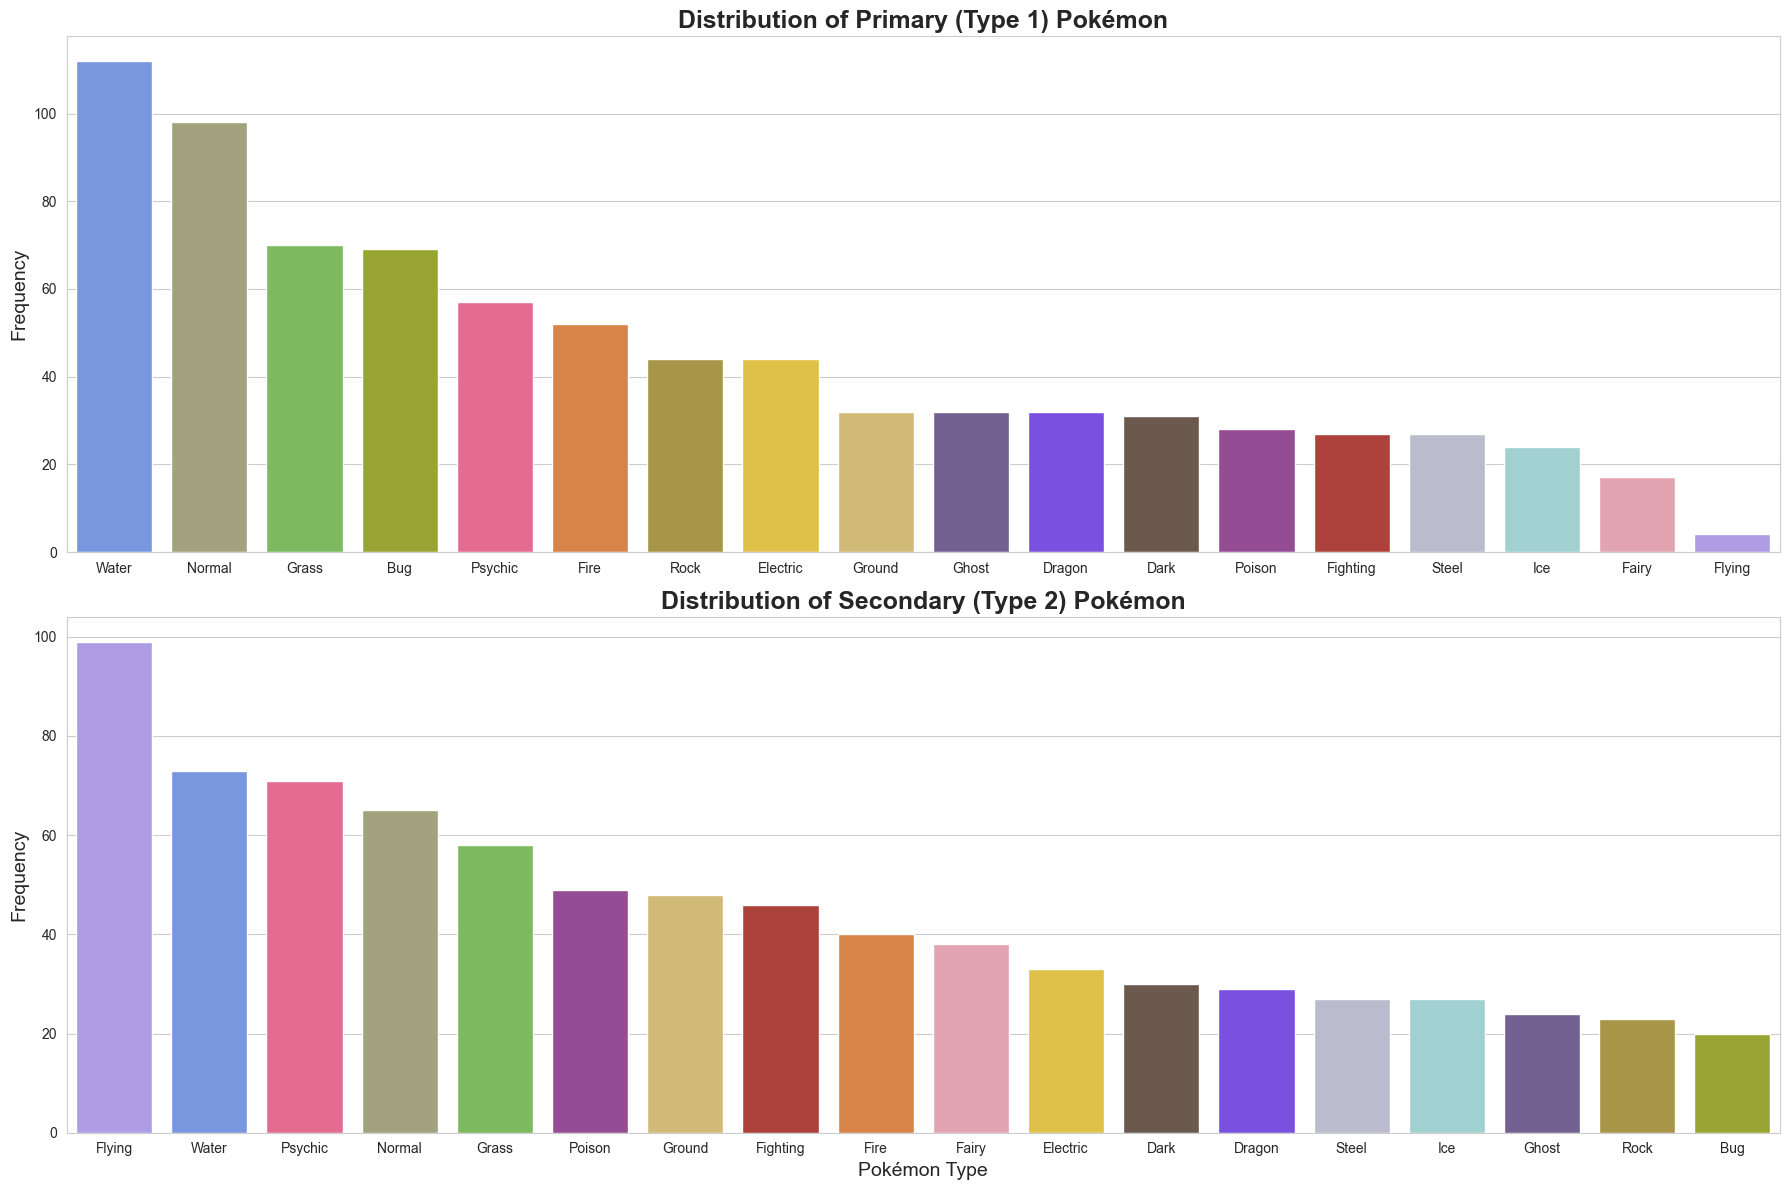

In [14]:
sns.set_style('whitegrid')
type_colors = {
    'Grass': '#78C850', 'Fire': '#F08030', 'Water': '#6890F0', 'Bug': '#A8B820',
    'Normal': '#A8A878', 'Poison': '#A040A0', 'Electric': '#F8D030', 'Ground': '#E0C068',
    'Fairy': '#EE99AC', 'Fighting': '#C03028', 'Psychic': '#F85888', 'Rock': '#B8A038',
    'Ghost': '#705898', 'Ice': '#98D8D8', 'Dragon': '#7038F8', 'Dark': '#705848',
    'Steel': '#B8B8D0', 'Flying': '#A890F0'
}

fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# Type 1 distribution
sns.countplot(
    x='Type 1',
    data=data,
    order=data['Type 1'].value_counts().index,
    hue='Type 1',
    palette=type_colors,
    legend=False,
    ax=ax[0]
)
ax[0].set_title('Distribution of Primary (Type 1) Pokémon', fontsize=18, fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency', fontsize=14)

# Type 2 distribution
sns.countplot(
    x='Type 2',
    data=data,
    order=data['Type 2'].value_counts().index,
    hue='Type 2',
    palette=type_colors,
    legend=False,
    ax=ax[1]
)
ax[1].set_title('Distribution of Secondary (Type 2) Pokémon', fontsize=18, fontweight='bold')
ax[1].set_xlabel('Pokémon Type', fontsize=14)
ax[1].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()



---

<a id="9"></a>

### **2.2 Percentages for Each Type**

**How about percentages for each type?**  
To visualize this, we’ll create a **donut chart** showing how frequently each Pokémon type appears in the dataset.

Before plotting, we need to **count all Pokémon types across both columns** while avoiding double‑counting. Earlier, we filled missing values in the *Type 2* column using *Type 1*, ensuring that Pokémon without a secondary type are still represented correctly. This step allows us to treat both columns consistently and compute accurate type percentages.

---


In [15]:
# Initialize a dictionary to track the frequency of each Pokémon type
types_count = {
    'Grass': 0, 'Fire': 0, 'Water': 0, 'Bug': 0, 'Normal': 0, 'Poison': 0,
    'Electric': 0, 'Ground': 0, 'Fairy': 0, 'Fighting': 0, 'Psychic': 0,
    'Rock': 0, 'Ghost': 0, 'Ice': 0, 'Dragon': 0, 'Dark': 0, 'Steel': 0, 'Flying': 0
}

type1 = data["Type 1"]
type2 = data["Type 2"]

for i in range(len(type1)):
    
    # Count occurrences from the primary type column
    types_count[type1.iloc[i]] += 1
    
    # Count secondary types while preventing double-counting identical dual types
    if type1.iloc[i] != type2.iloc[i]:
        types_count[type2.iloc[i]] += 1

for t in types_count:
    print("{:10} = {}".format(t, types_count[t]))

Grass      = 95
Fire       = 64
Water      = 126
Bug        = 72
Normal     = 102
Poison     = 62
Electric   = 50
Ground     = 67
Fairy      = 40
Fighting   = 53
Psychic    = 90
Rock       = 58
Ghost      = 46
Ice        = 38
Dragon     = 50
Dark       = 51
Steel      = 49
Flying     = 101


We got overall count from both types, now it's time to get *Type 1* count and *Type 2* count.

In [16]:
# Initialize dictionaries to count Type 1 and Type 2 frequencies
type1_count = {
    'Grass': 0, 'Fire': 0, 'Water': 0, 'Bug': 0, 'Normal': 0, 'Poison': 0,
    'Electric': 0, 'Ground': 0, 'Fairy': 0, 'Fighting': 0, 'Psychic': 0,
    'Rock': 0, 'Ghost': 0, 'Ice': 0, 'Dragon': 0, 'Dark': 0, 'Steel': 0,
    'Flying': 0
}

type2_count = {
    'Grass': 0, 'Fire': 0, 'Water': 0, 'Bug': 0, 'Normal': 0, 'Poison': 0,
    'Electric': 0, 'Ground': 0, 'Fairy': 0, 'Fighting': 0, 'Psychic': 0,
    'Rock': 0, 'Ghost': 0, 'Ice': 0, 'Dragon': 0, 'Dark': 0, 'Steel': 0,
    'Flying': 0
}

for i in range(len(type1)):
    type1_count[type1.iloc[i]] += 1
    type2_count[type2.iloc[i]] += 1

print("TYPE 1")
for t in type1_count:
    print("{:10} = {}".format(t, type1_count[t]))

print("-------------------")

print("TYPE 2")
for t in type2_count:
    print("{:10} = {}".format(t, type2_count[t]))

TYPE 1
Grass      = 70
Fire       = 52
Water      = 112
Bug        = 69
Normal     = 98
Poison     = 28
Electric   = 44
Ground     = 32
Fairy      = 17
Fighting   = 27
Psychic    = 57
Rock       = 44
Ghost      = 32
Ice        = 24
Dragon     = 32
Dark       = 31
Steel      = 27
Flying     = 4
-------------------
TYPE 2
Grass      = 58
Fire       = 40
Water      = 73
Bug        = 20
Normal     = 65
Poison     = 49
Electric   = 33
Ground     = 48
Fairy      = 38
Fighting   = 46
Psychic    = 71
Rock       = 23
Ghost      = 24
Ice        = 27
Dragon     = 29
Dark       = 30
Steel      = 27
Flying     = 99


Now we can create the donut charts for Type 1, Type 2, and the overall distribution.

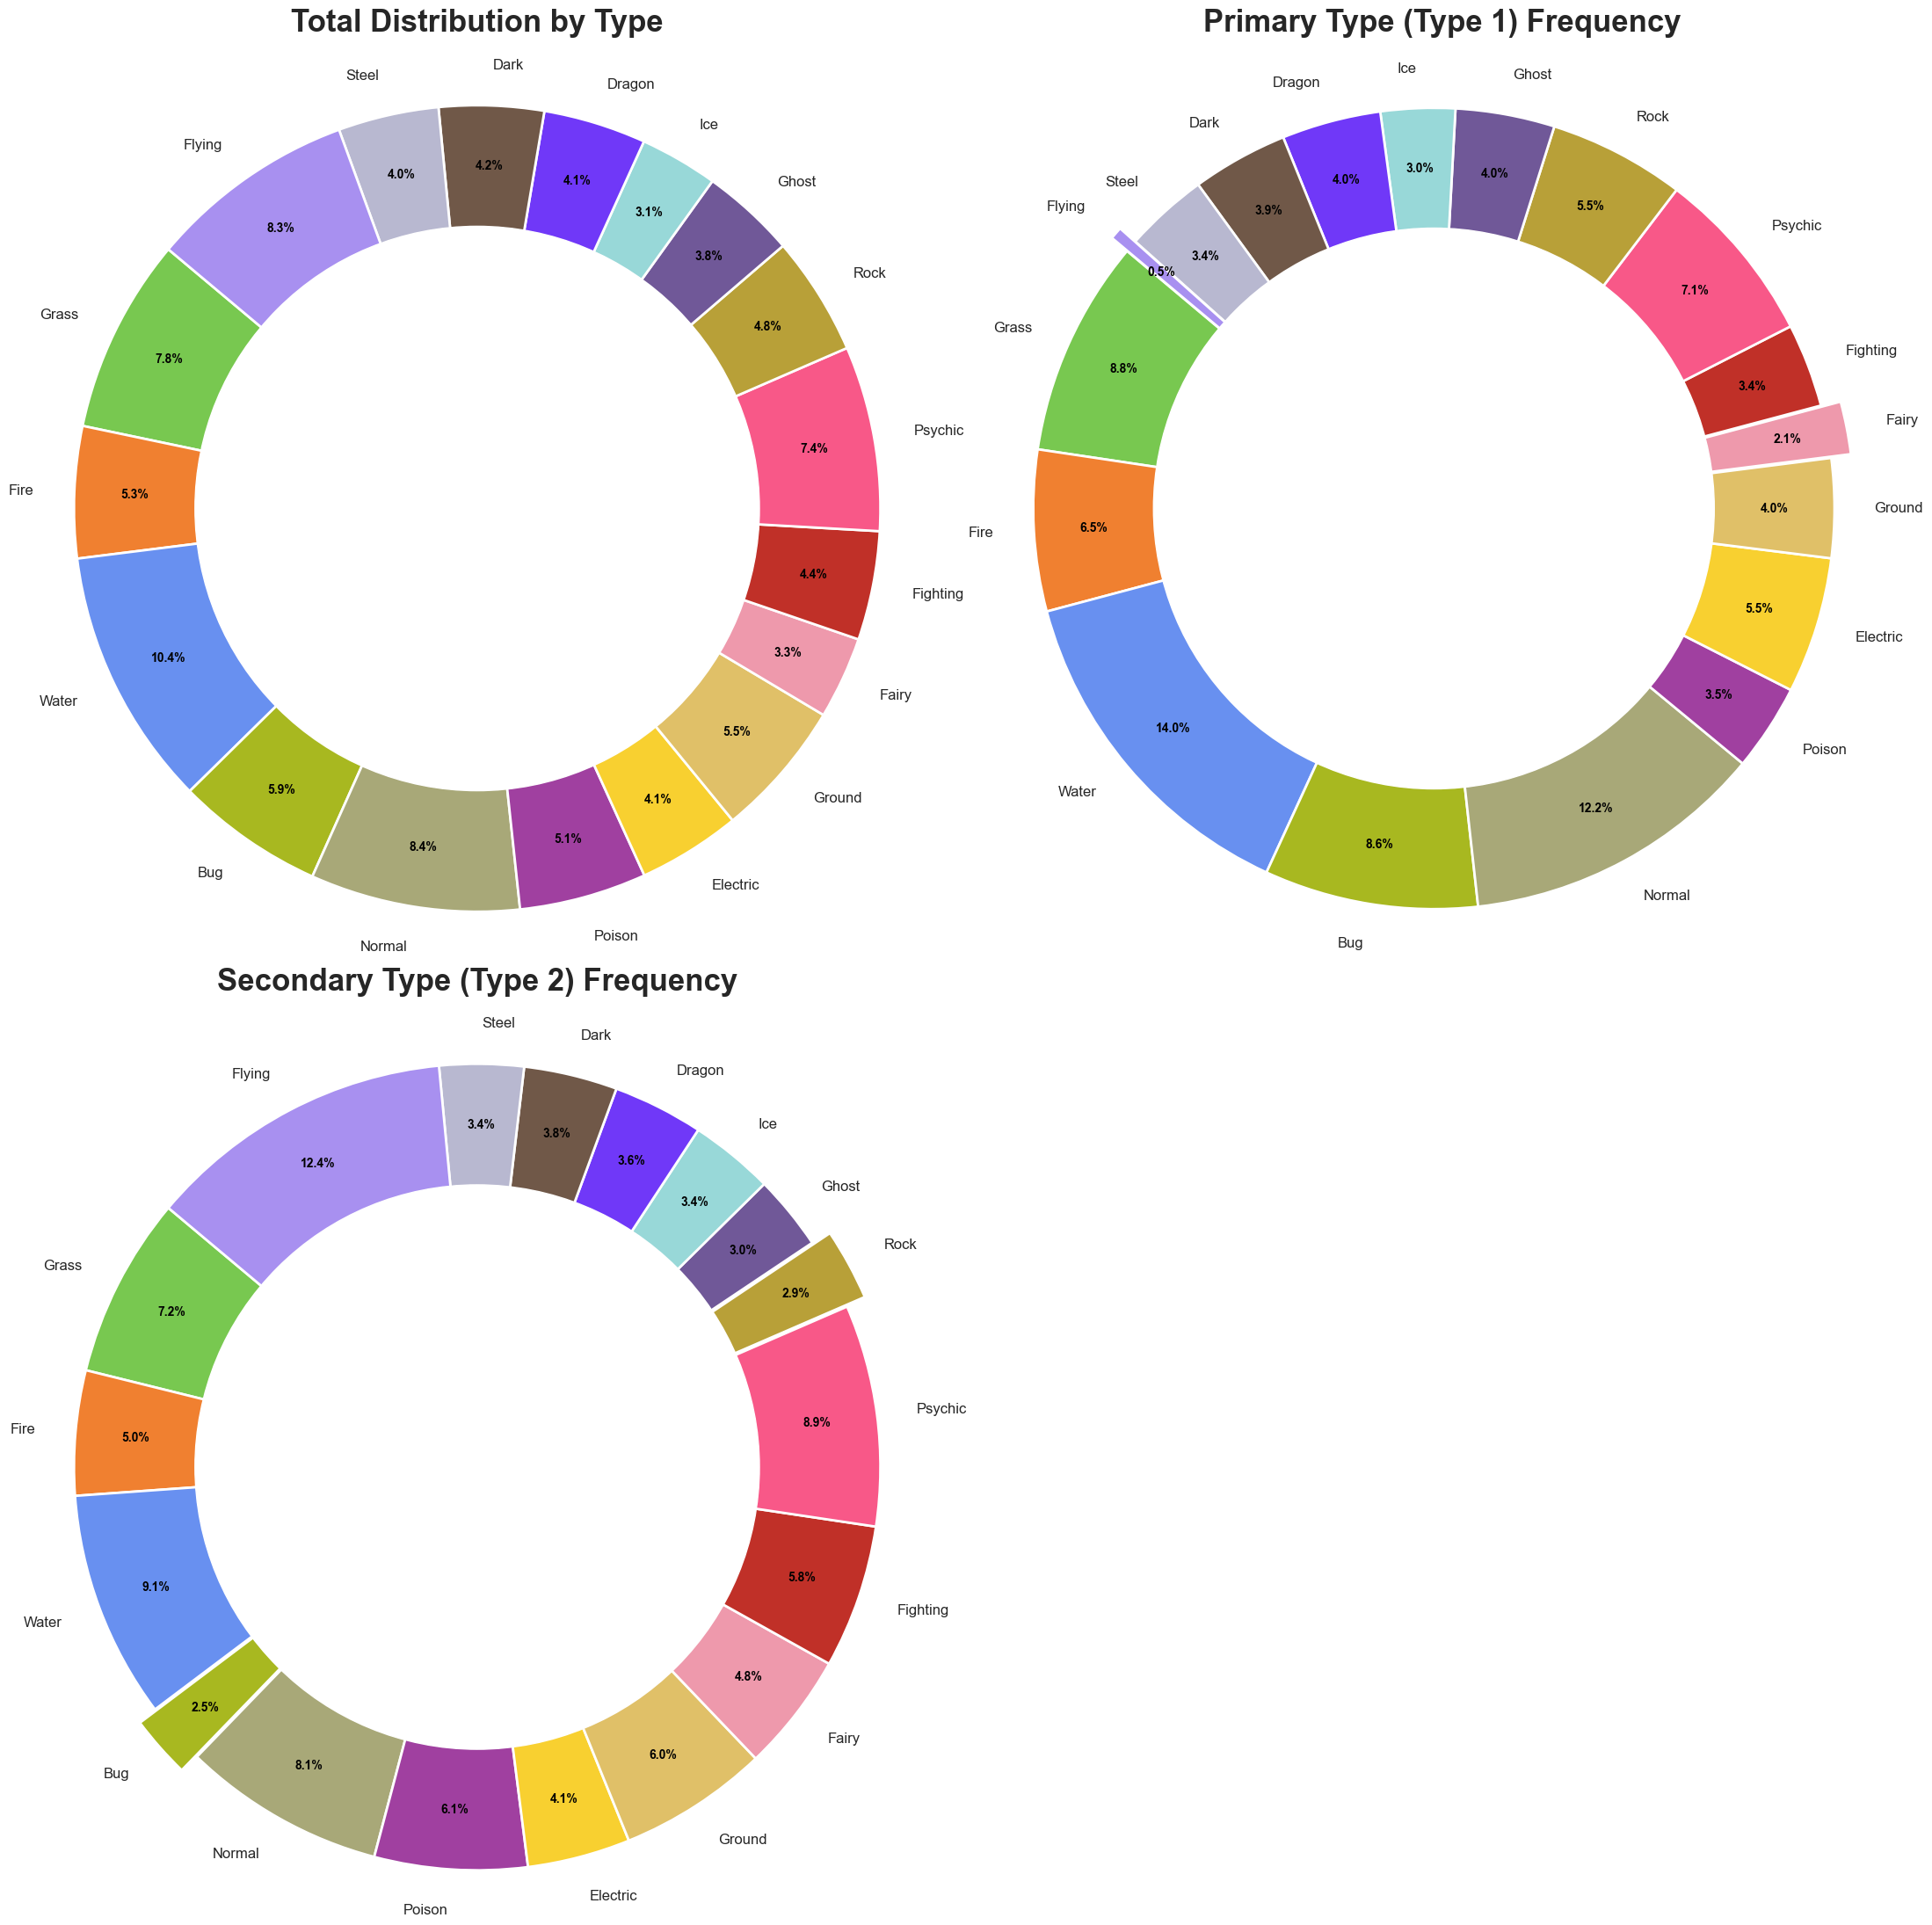

In [ ]:
# --- Preparing labels and sizes FIRST ---

# Labels must match your type order
labels = list(type_colors.keys())

# Convert your dictionaries into ordered lists
size0 = [types_count[label] for label in labels]      # Overall count
size1 = [type1_count[label] for label in labels]      # Type 1 count
size2 = [type2_count[label] for label in labels]      # Type 2 count

# --- Donut Chart Code ---

f, axs = plt.subplots(2, 2, figsize=(22, 22))

# Use the palette we defined earlier
colors = [type_colors[label] for label in labels]

def draw_clean_pie(ax, sizes, title):
    # 'Explode' the smaller slices slightly to make them visible
    explode = [0.05 if (x/sum(sizes)) < 0.03 else 0 for x in sizes]
    
    # Draw the pie
    patches, texts, autotexts = ax.pie(
        sizes, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode,
        pctdistance=0.85, shadow=False,
        wedgeprops={'edgecolor': 'white', 'linewidth': 2}
    )
    
    # Add a white circle in the middle to create the "Donut" effect
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    
    # Style the text labels
    plt.setp(autotexts, size=10, weight="bold", color="black")
    plt.setp(texts, size=12)
    
    ax.axis("equal")
    ax.set_title(title, size=25, fontweight='bold', pad=30)

# Execute for all three charts
draw_clean_pie(axs[0,0], size0, "Total Distribution by Type")
draw_clean_pie(axs[0,1], size1, "Primary Type (Type 1) Frequency")
draw_clean_pie(axs[1,0], size2, "Secondary Type (Type 2) Frequency")

# Remove the empty 4th subplot
f.delaxes(axs[1,1])

plt.tight_layout()
plt.show()


---

<a id="10"></a>

### **2.3 All‑Stats Analysis of the Pokémon**

This section explores the full range of Pokémon base stats by examining key ratios and comparative metrics. By analyzing how attributes like Attack, Defense, Speed, and HP relate to one another, we can uncover deeper patterns in overall performance and identify interesting outliers across the dataset.

---



In [18]:
data2 = data.drop(['Generation', 'Total', 'Legendary'], axis = 1) #we drop some columns that unnecessary
data2.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45
Ivysaur,Grass,Poison,60,62,63,80,80,60
Venusaur,Grass,Poison,80,82,83,100,100,80
VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
Charmander,Fire,Fire,39,52,43,60,50,65


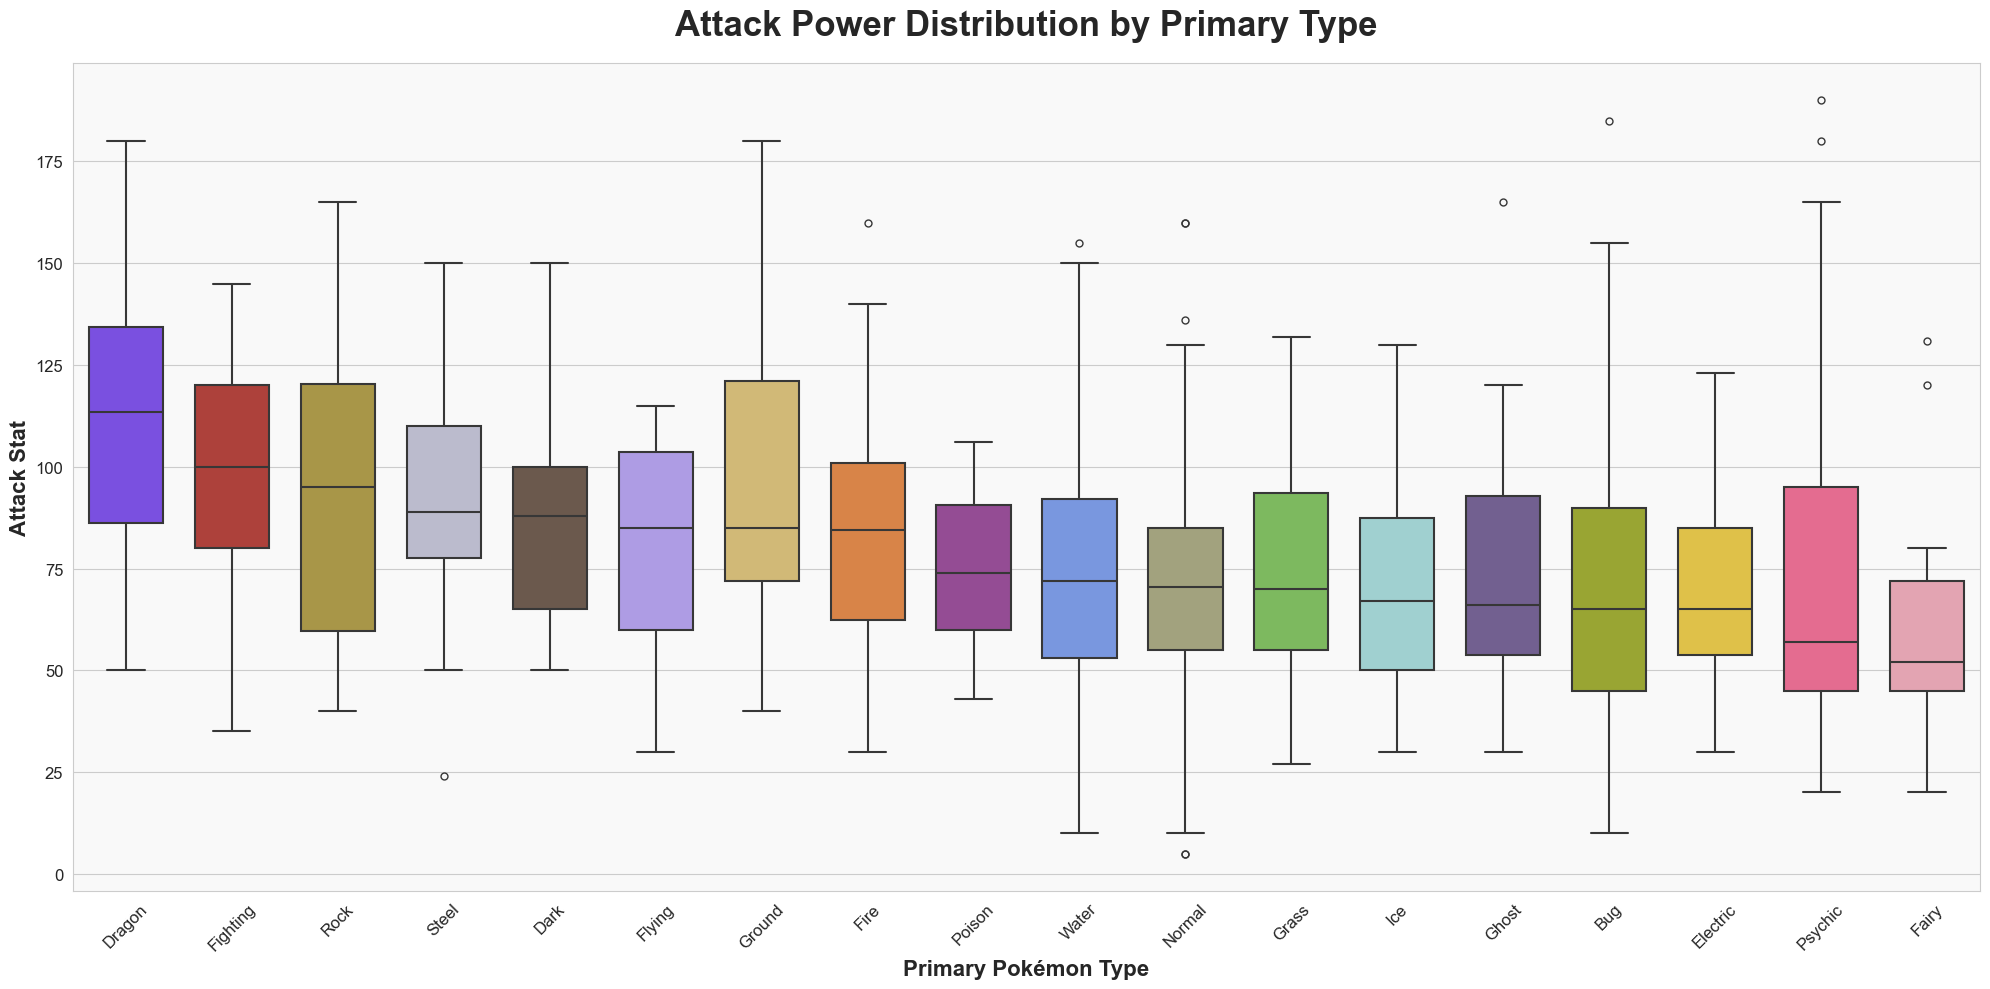

In [ ]:
# Set professional style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Sort types by median Attack
type_order = (
    data2.groupby('Type 1')['Attack']
    .median()
    .sort_values(ascending=False)
    .index
)

# Create the Boxplot with thematic colors and refined lines
ax = sns.boxplot(
    data=data2,
    x='Type 1',
    y='Attack',
    order=type_order,
    hue='Type 1',          
    palette=type_colors,
    legend=False,          # Prevents duplicate legend
    linewidth=1.5,
    fliersize=5,
    width=0.7
)

# Professional titles and axis labels
ax.set_title('Attack Power Distribution by Primary Type', fontsize=25, fontweight='bold', pad=20)
ax.set_xlabel('Primary Pokémon Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Attack Stat', fontsize=16, fontweight='bold')

# Rotate labels so they don't overlap
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Optional: Add a subtle background tint
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

Take a look at the data. We can conclude that the **Dragon** type pokemon has an advantage over other types because they have a higher attack compared to other types. Let's see the starter pokemon : Fire, Water, and Grass. Fire Pokemons have a higher attack than Water and Grass. So it's very recommended to use it for attacking opponent for every beginner trainer. (If you ever played pokemon, then u can understand what *starter pokemon* is)

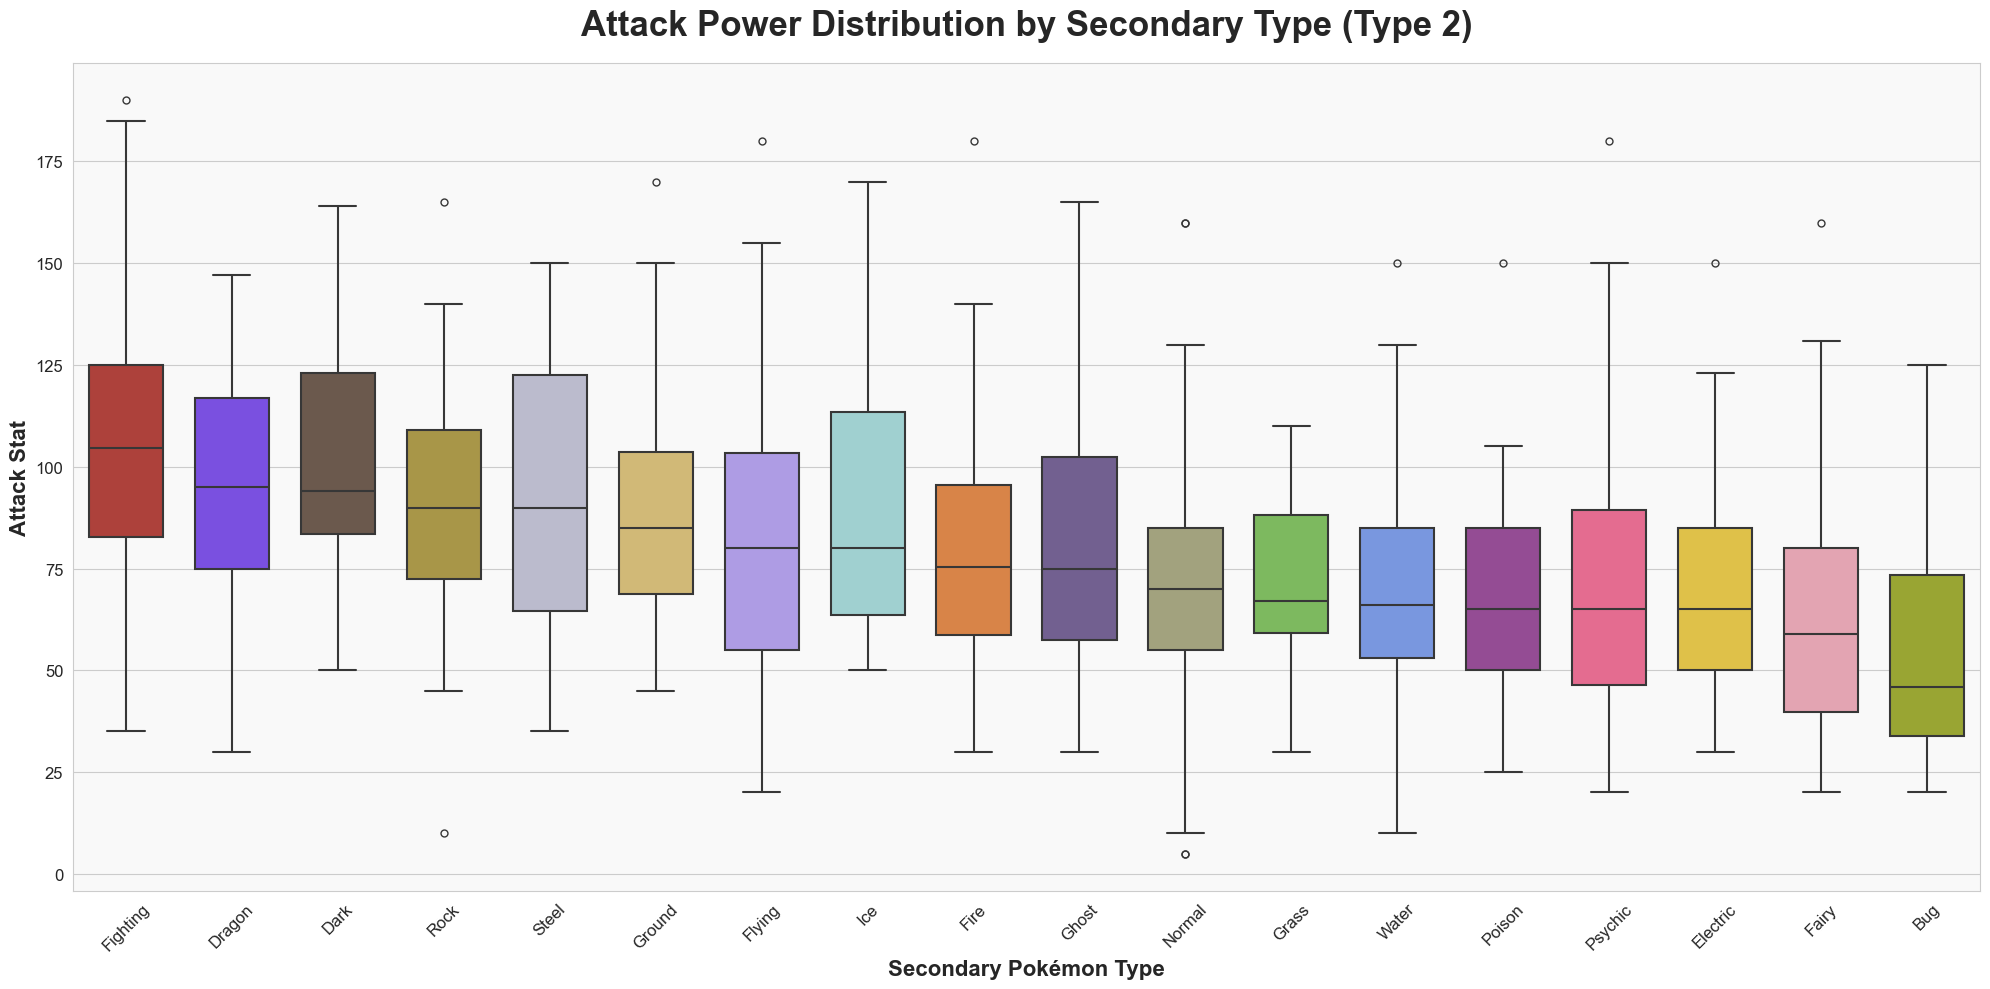

In [ ]:
# Set professional style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Filter data to exclude rows where Type 2 is missing for a cleaner analysis
type2_data = data2.dropna(subset=['Type 2'])

# Sorting types by median Attack to identify the strongest secondary types
type2_order = (
    type2_data.groupby('Type 2')['Attack']
    .median()
    .sort_values(ascending=False)
    .index
)

# Create the Boxplot with thematic colors
ax = sns.boxplot(
    data=type2_data,
    x='Type 2',
    y='Attack',
    order=type2_order,
    hue='Type 2',          
    palette=type_colors,
    legend=False,          # Prevents a huge legend
    linewidth=1.5,
    fliersize=5,
    width=0.7
)

# Enhance titles and labels
ax.set_title('Attack Power Distribution by Secondary Type (Type 2)', fontsize=25, fontweight='bold', pad=20)
ax.set_xlabel('Secondary Pokémon Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Attack Stat', fontsize=16, fontweight='bold')

# Rotate labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set background for contrast
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

And from this chart, we can conclude that **Fighting** pokemon have a higher attack than other pokemon types. All pokemons that have Fighting as their second type have higher attack value.

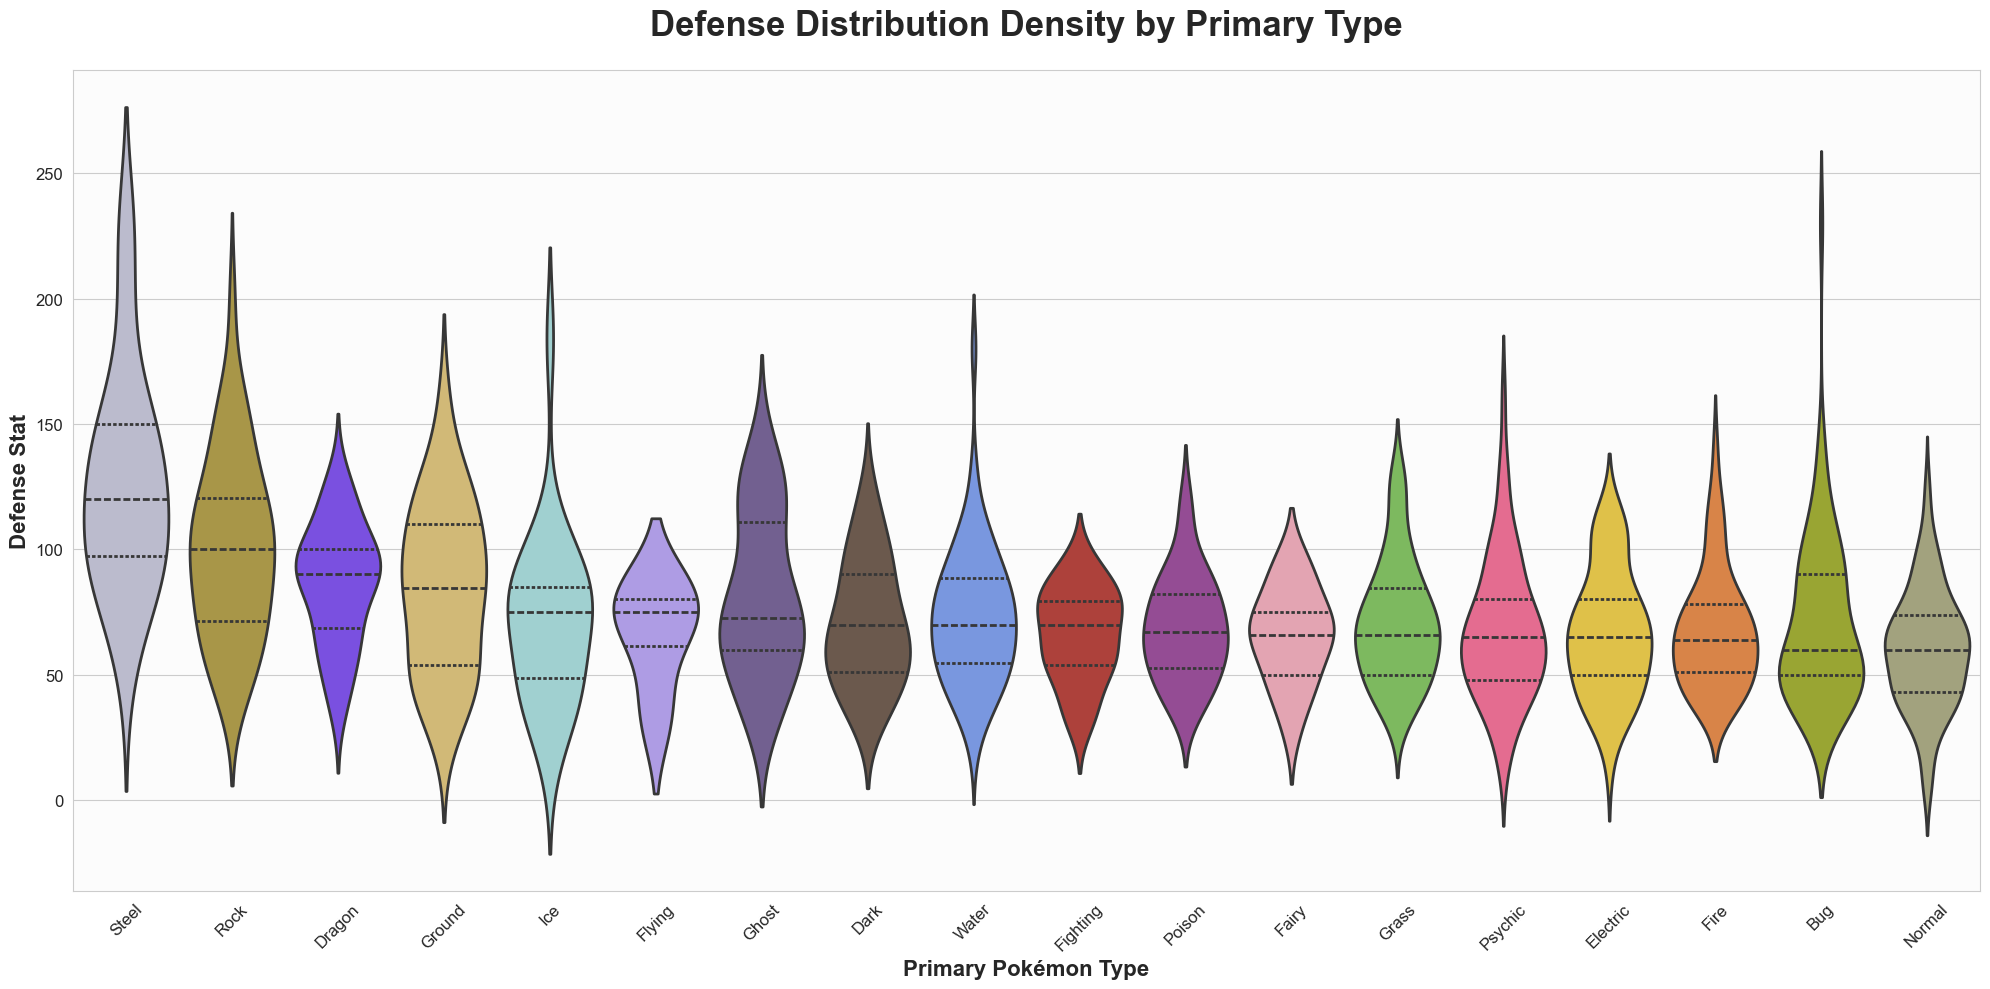

In [ ]:
# Set professional style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Sorting types by median Defense to show the hierarchy of "Tankiness"
defense_order = (
    data2.groupby('Type 1')['Defense']
    .median()
    .sort_values(ascending=False)
    .index
)

# Create the Violin Plot with thematic colors 
ax = sns.violinplot(
    data=data2,
    x='Type 1',
    y='Defense',
    order=defense_order,
    hue='Type 1',          # REQUIRED when using palette
    palette=type_colors,
    inner="quartile",
    linewidth=2,
    legend=False           # Prevents duplicate legend
)

# Professional titles and axis labels
ax.set_title('Defense Distribution Density by Primary Type', fontsize=25, fontweight='bold', pad=25)
ax.set_xlabel('Primary Pokémon Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Defense Stat', fontsize=16, fontweight='bold')

# Rotate labels for a clean, non-overlapping look
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set background for contrast
ax.set_facecolor('#fcfcfc')

plt.tight_layout()
plt.show()

This shows that **Steel** pokemon have the highest defense compared the other types.

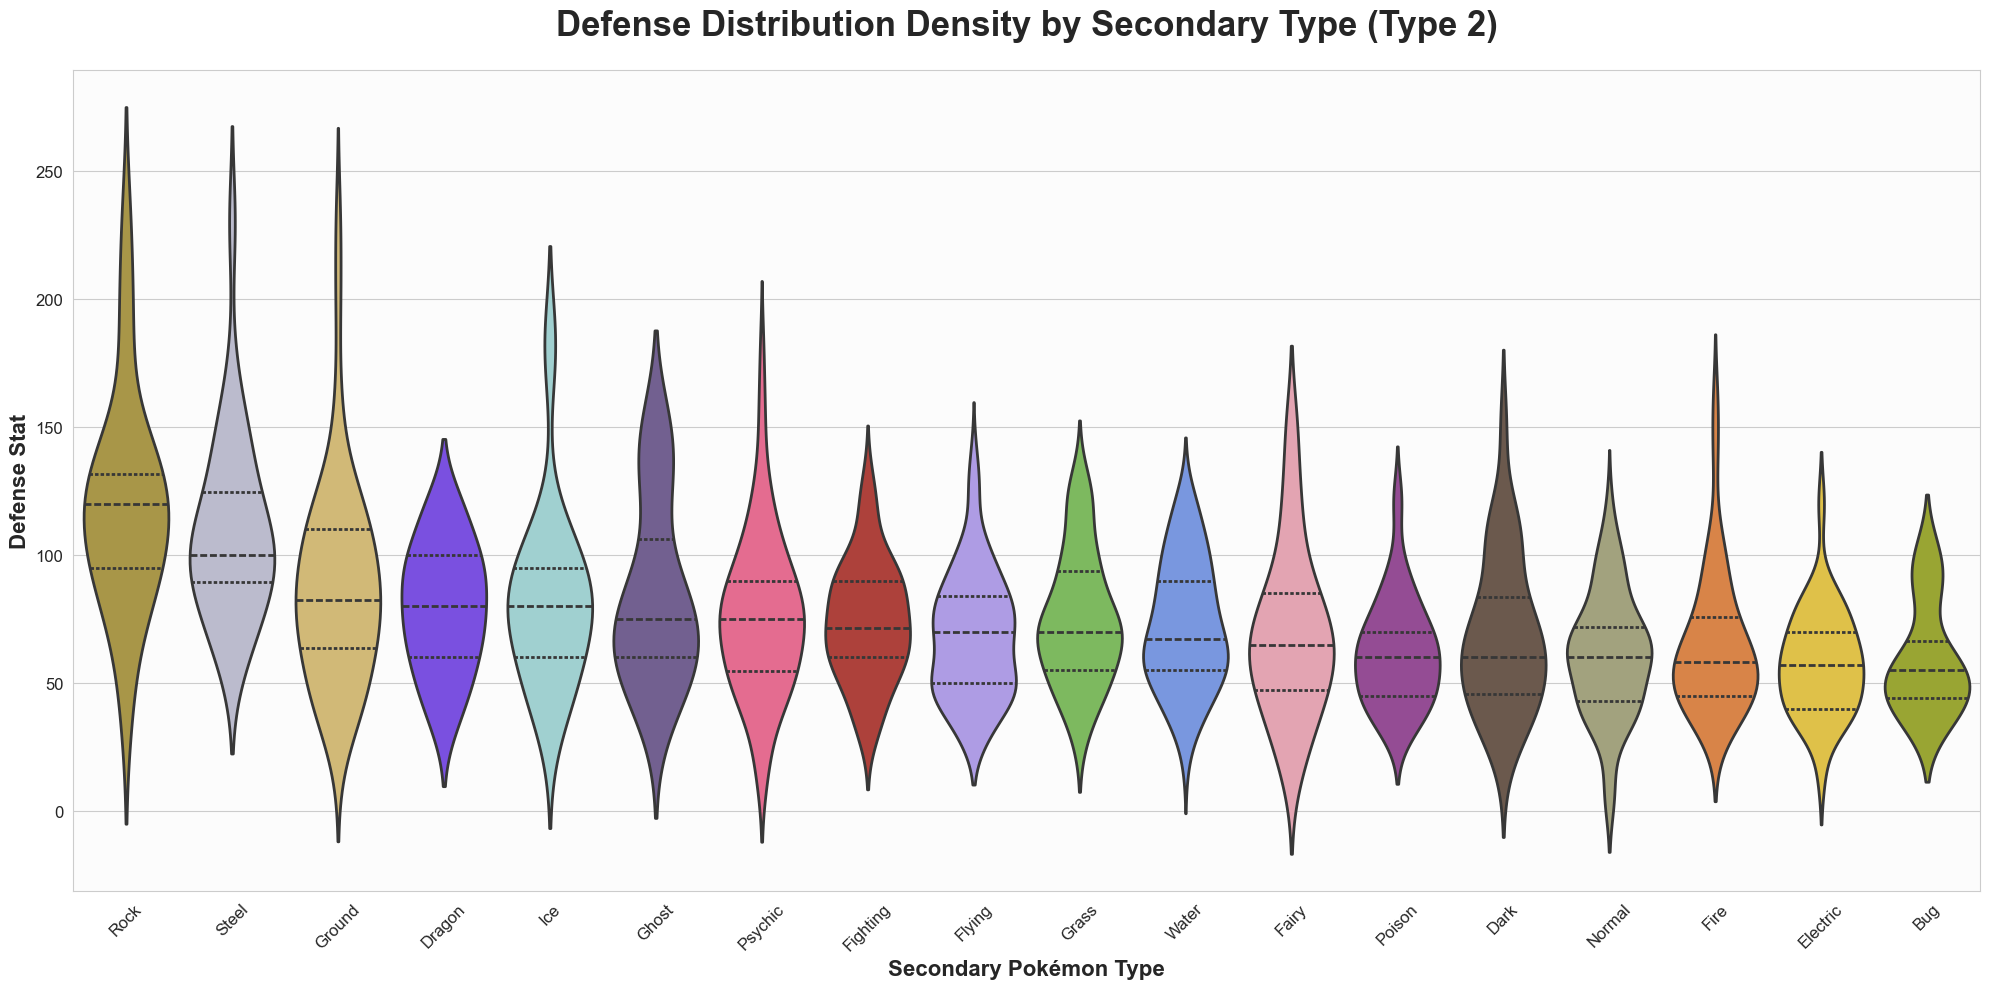

In [ ]:
# Set professional style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 10))

# Filter data to exclude rows where Type 2 is missing for a focused analysis
type2_defense_data = data2.dropna(subset=['Type 2'])

# Sorting types by median Defense to show the hierarchy of secondary type durability
defense_order_t2 = (
    type2_defense_data.groupby('Type 2')['Defense']
    .median()
    .sort_values(ascending=False)
    .index
)

# Create the Violin Plot with thematic colors 
ax = sns.violinplot(
    data=type2_defense_data,
    x='Type 2',
    y='Defense',
    order=defense_order_t2,
    hue='Type 2',          # REQUIRED when using palette
    palette=type_colors,
    inner="quartile",
    linewidth=2,
    legend=False           # Prevents duplicate legend
)

# Professional titles and axis labels
ax.set_title('Defense Distribution Density by Secondary Type (Type 2)', fontsize=25, fontweight='bold', pad=25)
ax.set_xlabel('Secondary Pokémon Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Defense Stat', fontsize=16, fontweight='bold')

# Rotate labels for a clean, non-overlapping look
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set background for contrast
ax.set_facecolor('#fcfcfc')

plt.tight_layout()
plt.show()

And this shows that **Rock** pokemon is better than **Steel** pokemon in Defense values.


---

<a id="11"></a>

### **2.4 Strongest Generation**

Which generation produces the strongest Pokémon overall?  
In this section, we compare average total base stats across all generations to identify which one stands out in terms of raw power.

---


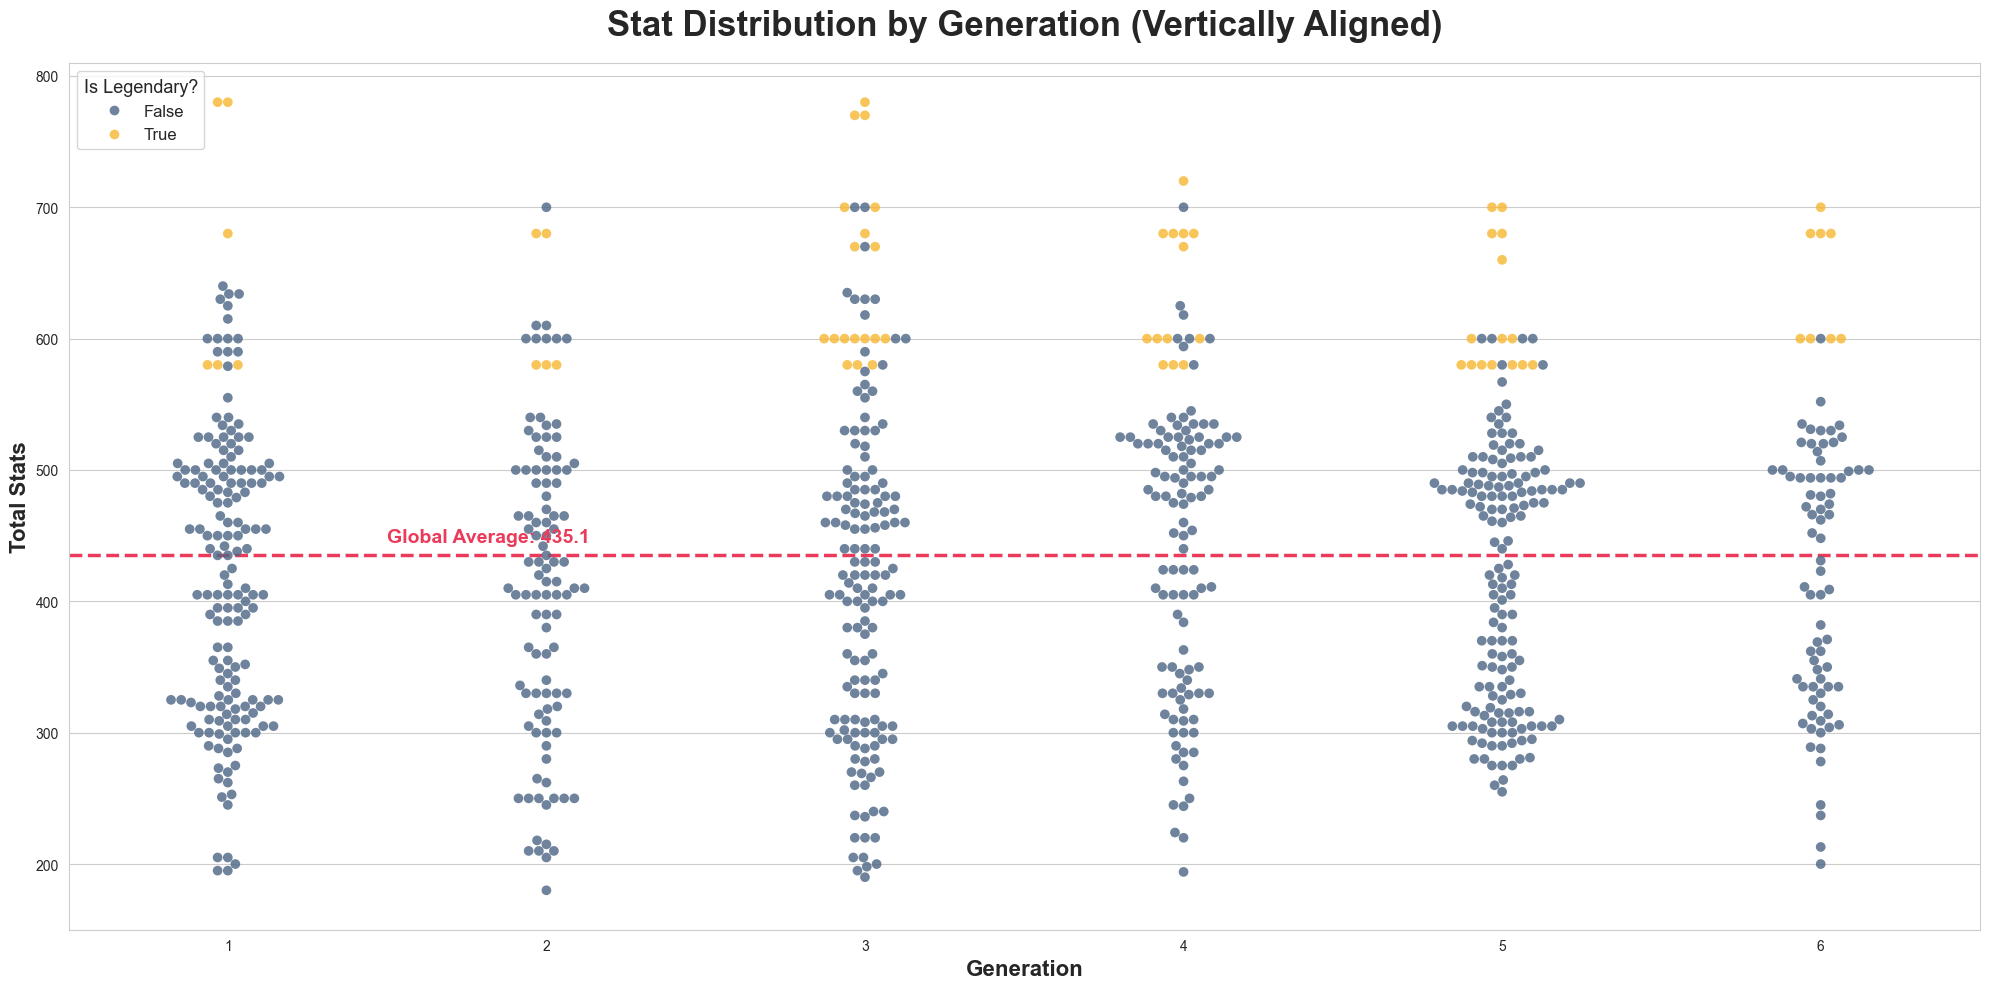

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))

# Using Option 1: Gold for Legendary, Slate for Normal
legendary_palette = {False: "#4b6584", True: "#f7b731"} 

# dodge=False keeps everything perfectly aligned with the X-axis labels
ax = sns.swarmplot(
    data=data, 
    x='Generation', 
    y='Total', 
    hue='Legendary', 
    palette=legendary_palette,
    size=7,        
    alpha=0.8,     # Slight transparency helps see overlapping density
    dodge=False    
)

# Add a labeled horizontal line at the mean
mean_val = data['Total'].mean()
plt.axhline(mean_val, color='#eb3b5a', linestyle='--', linewidth=2.5)
plt.text(0.5, mean_val + 10, f'Global Average: {mean_val:.1f}', 
         color='#eb3b5a', fontweight='bold', fontsize=14)

# Titles and Labels
ax.set_title('Stat Distribution by Generation (Vertically Aligned)', fontsize=25, fontweight='bold', pad=20)
ax.set_xlabel('Generation', fontsize=16, fontweight='bold')
ax.set_ylabel('Total Stats', fontsize=16, fontweight='bold')

# Legend customization
plt.legend(title='Is Legendary?', title_fontsize='13', fontsize='12', loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

The results indicate that **Generation 3** contains a notably high number of high‑stat Pokémon. The data also reinforces that **Legendary Pokémon consistently rank among the strongest**, with many occupying the top positions within their respective types.



---

<a id="12"></a>

### **2.5 Finding Correlations**

This section examines how different Pokémon stats relate to one another. By computing and visualizing correlation coefficients, we can identify which attributes tend to increase together, which trade off against each other, and which have the strongest influence on overall performance.

---


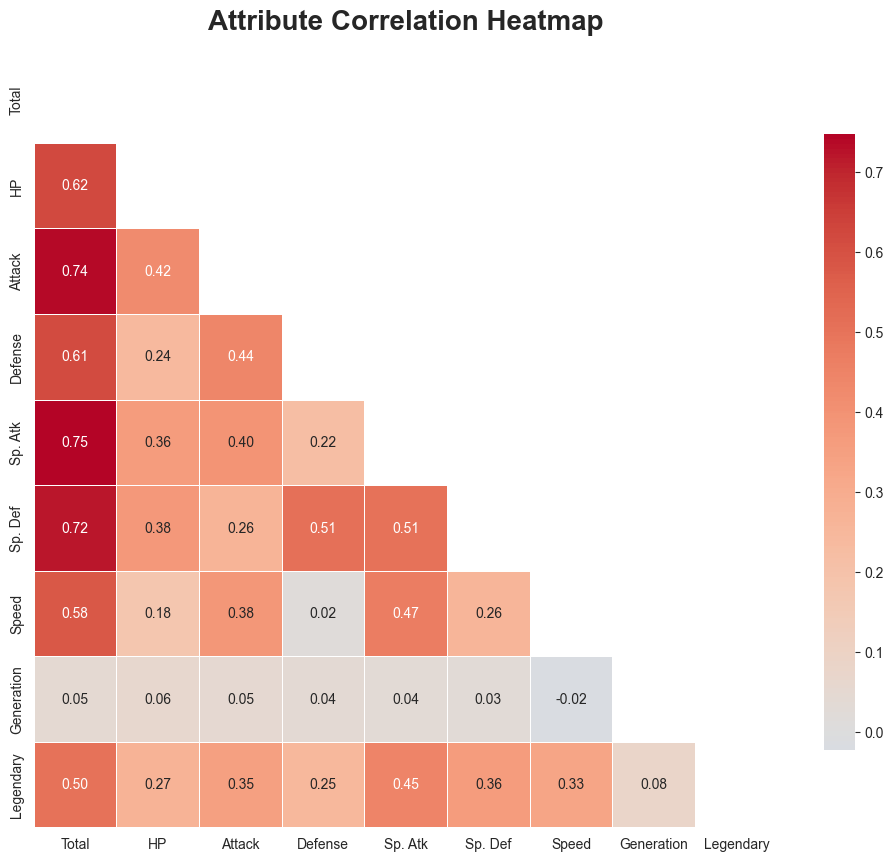

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("white")
plt.figure(figsize=(12, 10))

corr_matrix = data.corr(numeric_only=True)

# Create a 'mask' to hide the upper triangle (for a cleaner look)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Professional Heatmap
ax = sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    center=0,
    linewidths=.5, 
    cbar_kws={"shrink": .8}
)

plt.title('Attribute Correlation Heatmap', fontsize=20, fontweight='bold', pad=20)
plt.show()

The correlation matrix reveals that most Pokémon attributes are only modestly correlated, suggesting a balanced distribution of stats across the dataset. The Total stat shows the strongest relationship with **Sp. Attack**, followed closely by **Attack** and **Sp. Defense**. This indicates that offensive capabilities are the primary drivers behind a Pokémon's overall power rating

______________________________________

<a id = "13"></a>
# **Advanced Analytics**



### **3.1 Efficiency Metrics: Power‑to‑Speed Ratio**  
<a id="14"></a>

### **Understanding the Metric**

To evaluate how different Pokémon types balance **raw offensive power** against **speed**, I constructed a **Power‑to‑Speed Ratio**:

\[
\text{Power-to-Speed Ratio} = \frac{\text{Attack} + \text{Sp. Atk}}{\text{Speed}}
\]

This metric separates **Fast Sweepers** (high Speed, lower ratio) from **Slow Tanks** (low Speed, high ratio), revealing how efficiently a Pokémon converts its offensive stats into battle impact.

---

### **Findings**

- Types such as **Steel** and **Rock** consistently exhibit the **highest ratios**, suggesting they are designed to **absorb hits and retaliate with overwhelming force**.  
- These types often house Pokémon that trade agility for **burst damage potential**.

---

### **Strategic Value**

The Power‑to‑Speed Ratio highlights **“Hidden Gems”**—Pokémon that may not have exceptional Total Stats but possess **highly optimized offensive distribution**.  
These Pokémon can outperform expectations in specific roles, especially in formats where **speed control** or **bulk‑oriented offense** is valuable.

---



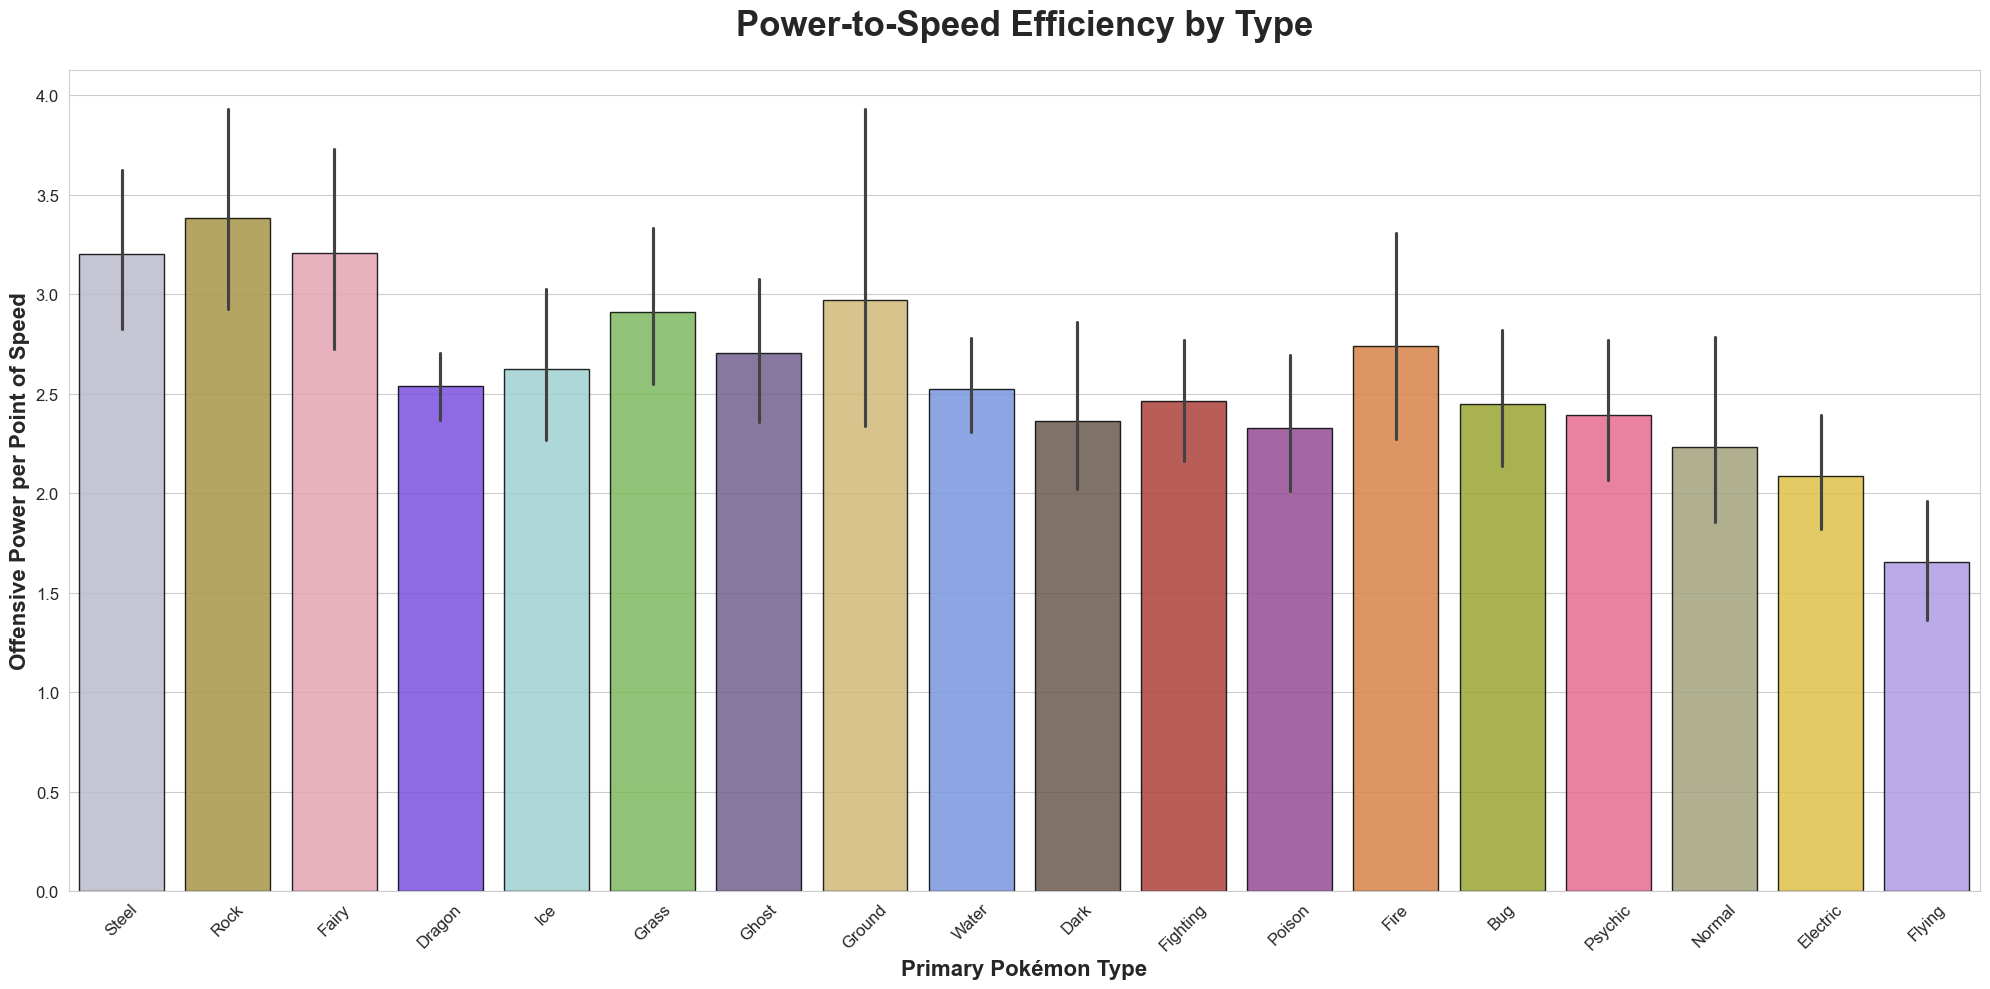

In [25]:
# 1. Feature Engineering
data['Power_Speed_Ratio'] = (data['Attack'] + data['Sp. Atk']) / data['Speed']

# 2. Setup Figure
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")

# 3. Sort
ratio_order = data.groupby('Type 1')['Power_Speed_Ratio'].median().sort_values(ascending=False).index

# 4. Plot (Updated to fix the FutureWarning)
ax = sns.barplot(
    data=data, 
    x='Type 1', 
    y='Power_Speed_Ratio', 
    order=ratio_order, 
    hue='Type 1',         # Assign Type 1 to hue to fix the warning
    palette=type_colors, 
    legend=False,         # Hide the legend since the x-axis already labels the types
    edgecolor='black',    
    alpha=0.85            
)

# 5. Professional Formatting
ax.set_title('Power-to-Speed Efficiency by Type', fontsize=25, fontweight='bold', pad=25)
ax.set_xlabel('Primary Pokémon Type', fontsize=16, fontweight='bold')
ax.set_ylabel('Offensive Power per Point of Speed', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


---

<a id="15"></a>

### **3.2 Outlier Detection: Identifying Stat Extremes**

While averages help us understand the “typical” Pokémon, outliers reveal the **mechanical boundaries** of the game. These extreme cases often shape competitive strategies, influence tier placements, and highlight intentional design choices.

To identify these extremes, we examine Pokémon that fall at the far ends of each stat distribution. Using statistical methods such as the **Z‑Score** and the **Interquartile Range (IQR)**, we can formally define what qualifies as an **outlier** and isolate Pokémon whose stats deviate significantly from the norm.

---


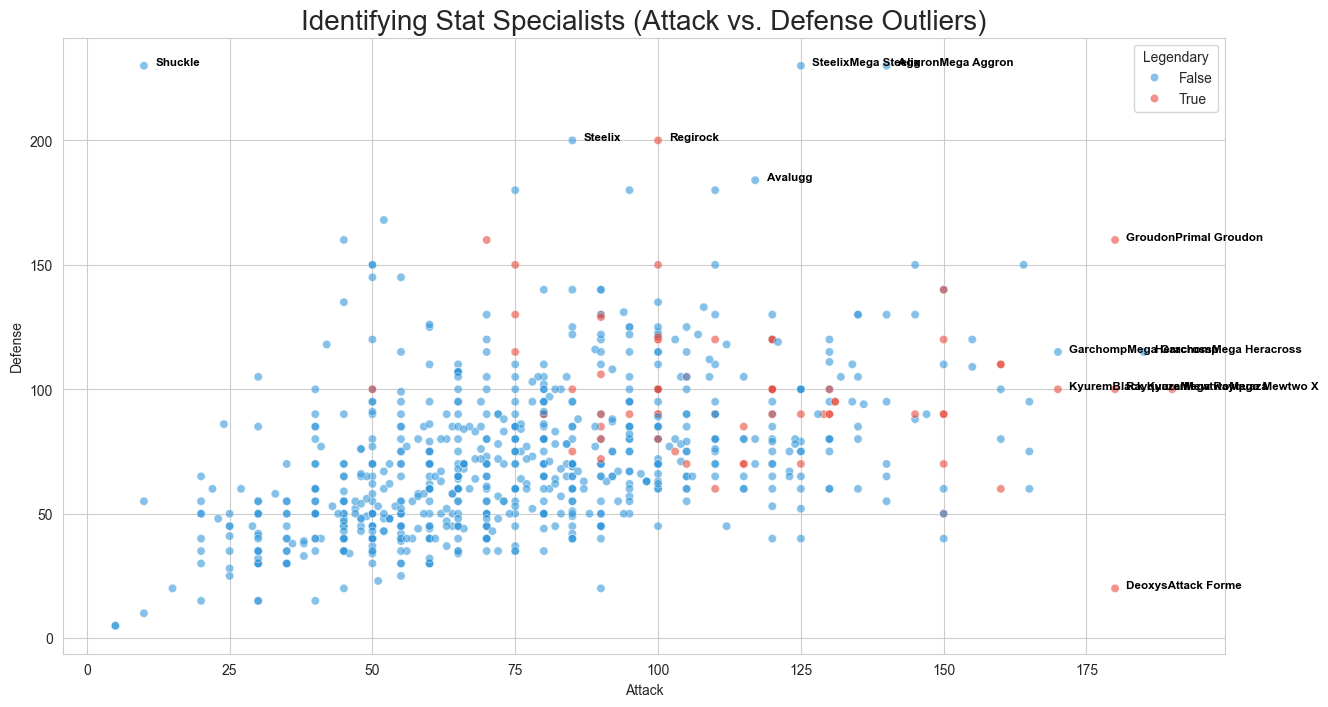

In [26]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# Create a scatter plot of Attack vs Defense
ax = sns.scatterplot(
    data=data,
    x='Attack',
    y='Defense',
    hue='Legendary',
    palette={False: '#3498db', True: '#e74c3c'},
    alpha=0.6
)

# Function to annotate outliers (Top 1% of Attack or Defense)
top_attack = data['Attack'].quantile(0.99)
top_defense = data['Defense'].quantile(0.99)

# Loop using iloc for positional indexing
for i in range(data.shape[0]):
    atk = data['Attack'].iloc[i]
    dfs = data['Defense'].iloc[i]

    if atk > top_attack or dfs > top_defense:
        ax.text(
            atk + 2,
            dfs,
            data.index[i],
            horizontalalignment='left',
            size='small',
            color='black',
            weight='semibold'
        )

plt.title('Identifying Stat Specialists (Attack vs. Defense Outliers)', fontsize=20)
plt.show()


### **A. High‑HP Tanks (HP Outliers)**  
These Pokémon function as extreme damage absorbers

**Findings:**  
- Pokémon such as **Blissey** and **Chansey** sit **more than 3 standard deviations above the mean HP**.  
- Their HP values are statistical anomalies relative to the full population of 800+ Pokémon.  
- These outliers define the **upper boundary of survivability** in the dataset.

---

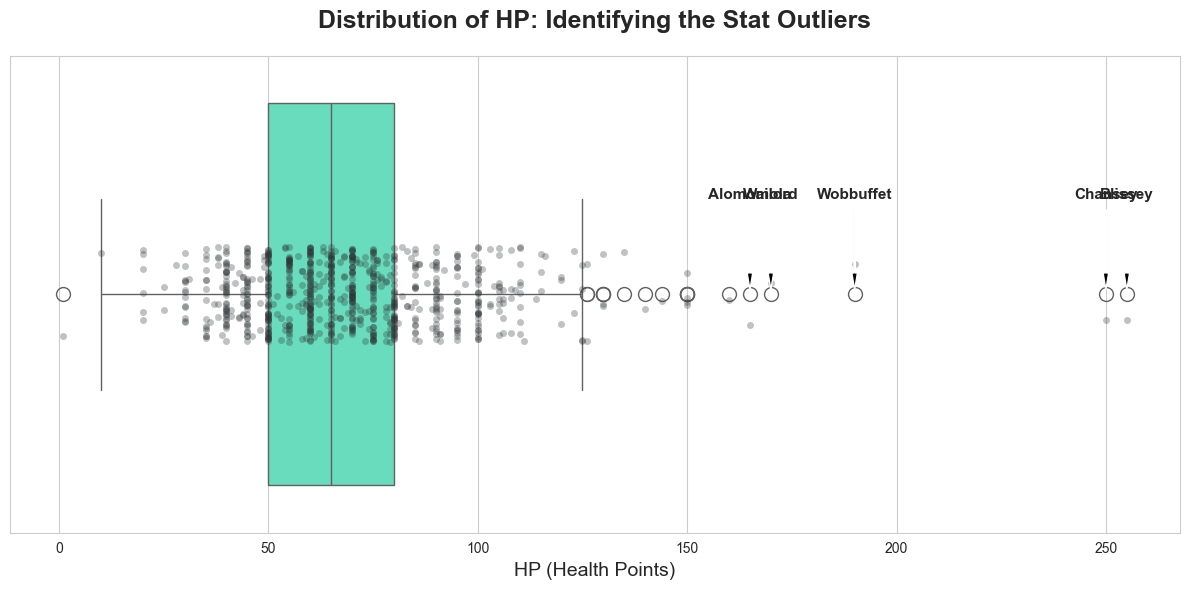

Detected 18 HP outliers (Threshold: > 125.0 HP)
                        Type 1   HP  Legendary
Name                                          
Blissey                 Normal  255      False
Chansey                 Normal  250      False
Wobbuffet              Psychic  190      False
Wailord                  Water  170      False
Alomomola                Water  165      False
Snorlax                 Normal  160      False
GiratinaOrigin Forme     Ghost  150       True
GiratinaAltered Forme    Ghost  150       True
Drifblim                 Ghost  150      False
Slaking                 Normal  150      False


In [27]:
# 1. Statistical Calculation (IQR Method)
Q1 = data['HP'].quantile(0.25)
Q3 = data['HP'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# 2. Filter the Outliers
hp_outliers = data[data['HP'] > upper_bound].sort_values(by='HP', ascending=False)

# 3. Visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Boxplot + stripplot
ax = sns.boxplot(x=data['HP'], color='#55efc4', fliersize=10)
sns.stripplot(x=data['HP'], color='#2d3436', alpha=0.3)

# 4. Annotate the Top 5 Outliers
top5 = hp_outliers.head(5)

for name, row in top5.iterrows():
    hp_val = row['HP']
    plt.annotate(
        name,
        xy=(hp_val, 0),
        xytext=(hp_val, -0.2),
        arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4),
        horizontalalignment='center',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Distribution of HP: Identifying the Stat Outliers', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('HP (Health Points)', fontsize=14)

plt.tight_layout()
plt.show()

# 5. Display the Data Table for the report
print(f"Detected {len(hp_outliers)} HP outliers (Threshold: > {upper_bound} HP)")
print(hp_outliers[['Type 1', 'HP', 'Legendary']].head(10))

### **B. Glass Cannons (High Offense, Low Defense)**  
This category captures Pokémon with **very high Attack** but **extremely low Defense**, creating a volatile risk–reward profile.

**Findings:**  
- Forms like **Deoxys (Attack Forme)** exhibit **extreme offensive spikes** paired with **near‑zero defensive bulk**.  
- These Pokémon represent the classic **“High‑Risk, High‑Reward”** archetype in game design.  
- Their stat distribution skews heavily toward burst damage rather than sustained presence.

---

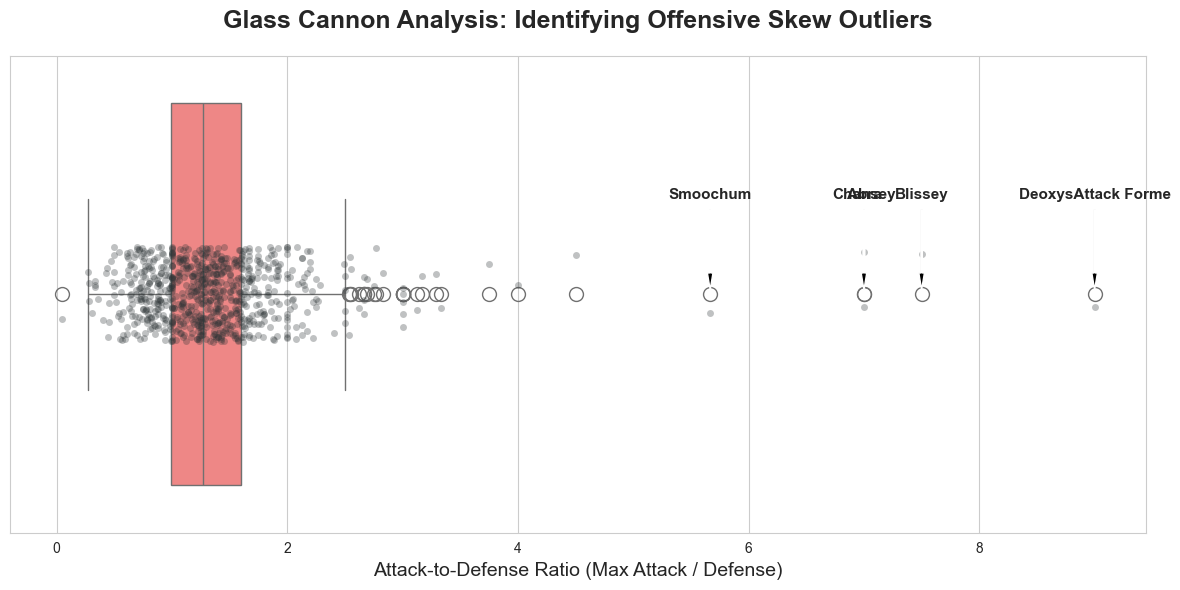

Detected 28 Glass Cannon outliers (Threshold: Ratio > 2.51)
                        Type 1  Attack  Sp. Atk  Defense  GC_Ratio
Name                                                              
DeoxysAttack Forme     Psychic     180      180       20  9.000000
Blissey                 Normal      10       75       10  7.500000
Abra                   Psychic      20      105       15  7.000000
Chansey                 Normal       5       35        5  7.000000
Smoochum                   Ice      30       85       15  5.666667
Carvanha                 Water      90       65       20  4.500000
Kadabra                Psychic      35      120       30  4.000000
BeedrillMega Beedrill      Bug     150       15       40  3.750000
Gastly                   Ghost      35      100       30  3.333333
Jynx                       Ice      50      115       35  3.285714


In [28]:
# 1. Feature Engineering: Define the Glass Cannon Ratio
# Using the higher of the two attack stats for a more accurate "Cannon" definition
data['Max_Attack'] = data[['Attack', 'Sp. Atk']].max(axis=1)
data['GC_Ratio'] = data['Max_Attack'] / data['Defense']

# 2. Statistical Calculation (IQR Method)
Q1_gc = data['GC_Ratio'].quantile(0.25)
Q3_gc = data['GC_Ratio'].quantile(0.75)
IQR_gc = Q3_gc - Q1_gc
upper_bound_gc = Q3_gc + 1.5 * IQR_gc

# 3. Filter the top outliers
gc_outliers = data[data['GC_Ratio'] > upper_bound_gc].sort_values(by='GC_Ratio', ascending=False)

# 4. Visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.boxplot(x=data['GC_Ratio'], color='#ff7675', fliersize=10)
sns.stripplot(x=data['GC_Ratio'], color='#2d3436', alpha=0.3) 

# 5. Annotate Top Outliers (with a safety check for count)
num_to_label = min(len(gc_outliers), 5)
for i in range(num_to_label):
    pokemon_name = gc_outliers.index[i]
    ratio_val = gc_outliers['GC_Ratio'].iloc[i]
    plt.annotate(pokemon_name, 
                 xy=(ratio_val, 0), 
                 xytext=(ratio_val, -0.2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4),
                 horizontalalignment='center', 
                 fontsize=11, 
                 fontweight='bold')

plt.title('Glass Cannon Analysis: Identifying Offensive Skew Outliers', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Attack-to-Defense Ratio (Max Attack / Defense)', fontsize=14)

plt.tight_layout()
plt.show()

# 6. Corrected Summary Table
print(f"Detected {len(gc_outliers)} Glass Cannon outliers (Threshold: Ratio > {upper_bound_gc:.2f})")
print(gc_outliers[['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'GC_Ratio']].head(10))


### **C. Speed Demons (Top‑End Speed Outliers)**  
Speed is often the most binary stat, either you move first or you don’t.

**Findings:**  
- **Ninjask** and **Regieleki** define the **absolute ceiling** of Speed in the dataset.  
- These outliers shape the **upper tiers of competitive Speed benchmarks**, influencing team‑building and matchup dynamics.

---


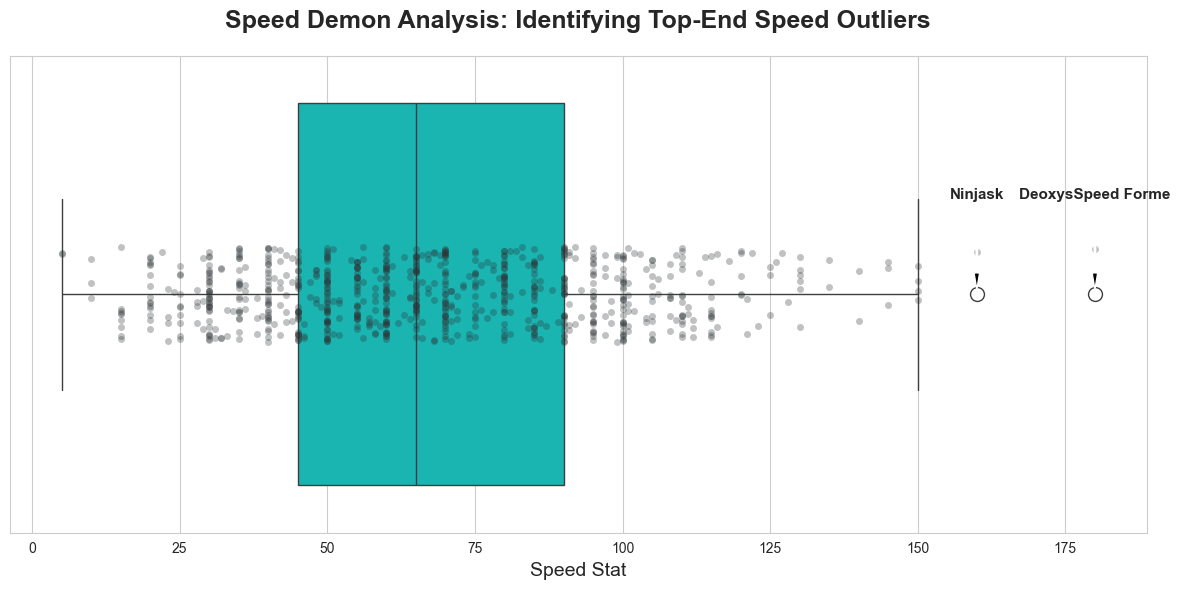

Detected 2 Speed outliers (Threshold: Speed > 157.50)
                    Type 1  Speed  Legendary
Name                                        
DeoxysSpeed Forme  Psychic    180       True
Ninjask                Bug    160      False


In [29]:
# 1. Statistical Calculation (IQR Method)
# We apply the standard outlier formula to the Speed stat
Q1_sp = data['Speed'].quantile(0.25)
Q3_sp = data['Speed'].quantile(0.75)
IQR_sp = Q3_sp - Q1_sp
upper_bound_sp = Q3_sp + 1.5 * IQR_sp

# 2. Filter the Speed Outliers
speed_outliers = data[data['Speed'] > upper_bound_sp].sort_values(by='Speed', ascending=False)

# 3. Visualization (Consistent with previous sections)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a boxplot for Speed
# Using an "Electric" cyan color to represent Speed
ax = sns.boxplot(x=data['Speed'], color='#00cec9', fliersize=10)
sns.stripplot(x=data['Speed'], color='#2d3436', alpha=0.3) 

# 4. Annotate the Top 5 most extreme Speed Demons
num_to_label = min(len(speed_outliers), 5)
for i in range(num_to_label):
    pokemon_name = speed_outliers.index[i]
    speed_val = speed_outliers['Speed'].iloc[i]
    plt.annotate(pokemon_name, 
                 xy=(speed_val, 0), 
                 xytext=(speed_val, -0.2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=4),
                 horizontalalignment='center', 
                 fontsize=11, 
                 fontweight='bold')

plt.title('Speed Demon Analysis: Identifying Top-End Speed Outliers', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Speed Stat', fontsize=14)

plt.tight_layout()
plt.show()

# 5. Display Summary Table
print(f"Detected {len(speed_outliers)} Speed outliers (Threshold: Speed > {upper_bound_sp:.2f})")
print(speed_outliers[['Type 1', 'Speed', 'Legendary']].head(10))


### **Impact of Outliers on Generational Balance**

By examining outliers across generations, we can assess whether **power creep** arises from:

- The *average* Pokémon becoming stronger
- The *extremes* becoming more exaggerated.

**Analysis:**  
- The **average total base stat** has remained relatively stable across generations.  
- However, the **frequency and extremity of outliers**—especially **Mega Evolutions** and **Legendary Pokémon**—has increased in later generations.  
- This suggests that modern power creep is driven **not by raising the floor**, but by **pushing the ceiling higher** through more extreme stat distributions.

---





<a id="16"></a>
### **3.3. Hypothesis Testing: The Legendary Advantage**

### **Defining the Hypothesis**

To evaluate whether **Legendary status** is associated with significantly higher overall strength, we conduct a **Two‑Sample T‑Test** comparing the mean **Total Base Stats** of Legendary vs. Non‑Legendary Pokémon.

### **Null Hypothesis \(H_0\)**  
There is **no statistically significant difference** between the mean Total Stats of Legendary and Non‑Legendary Pokémon.  
Any observed difference is attributable to random variation.

### **Alternative Hypothesis \(H_1\)**  
Legendary Pokémon have a **significantly higher mean Total Stat** than Non‑Legendary Pokémon.

---


In [30]:
# 1. Split the data into two groups
legendary = data[data['Legendary'] == True]['Total']
non_legendary = data[data['Legendary'] == False]['Total']

# 2. Perform the Independent T-Test
t_stat, p_val = stats.ttest_ind(legendary, non_legendary)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4e}") # Using scientific notation for small numbers

T-Statistic: 16.3861
P-Value: 3.0952e-52





### **Interpretation of Results**

The T‑Test yielded a p‑value of **3.0952e-52**, which is far below the standard significance threshold of 0.05. This provides strong statistical evidence to **reject the null hypothesis**. In other words, we can say with 95% confidence that Legendary Pokémon have **significantly higher Total Base Stats** than their Non‑Legendary counterparts.

Moreover, the large magnitude of the T‑statistic indicates that this difference is not driven by a handful of extreme cases. Instead, it reflects a **consistent and intentional design distinction** between Legendary and Non‑Legendary Pokémon across the dataset.

---




<a id="17"></a>

## **4. Key Insights & Conclusion**





<a id="18"></a>
### **4.1 Summary of Findings**

Through this Exploratory Data Analysis, several structural patterns within the Pokémon ecosystem become clear:

- **The Power of Specialization:**  
  High‑performing Pokémon (outliers) are rarely balanced. They tend to be optimized for a single extreme stat—either **Special Attack** (Glass Cannons) or **Defense** (Tanks).

- **Offensive Dominance:**  
  Correlation analysis shows **Special Attack** is the strongest predictor of Total Base Stats, suggesting that offensive capability is weighted more heavily in the design meta than defensive utility.

- **Generational Consistency:**  
  Despite concerns about “Power Creep,” Generations 1–6 show remarkably stable median stat totals. Growth occurs primarily in **Outlier** and **Legendary** categories rather than the general population.

---



<a id="19"></a>

### **4.2 Final Thoughts: The TL;DR**

After analyzing the stats of 800+ Pokémon, here’s the distilled takeaway:

- **Don’t ignore the slow ones:**  
  Power‑to‑Speed analysis shows that many heavy hitters (Steel, Rock types) are slow *by design*. If you can keep them alive, they hit incredibly hard.

- **The “Special” Meta:**  
  Special Attack is the strongest statistical driver of high Total Base Stats. If you want raw power, look here first.

- **Legendaries are legit:**  
  The T‑Test confirms that Legendaries operate in a completely different statistical league. If you have one, use it.

- **Balance is real:**  
  Across six generations, the “average” Pokémon hasn’t changed much. Developers have maintained balance while still introducing stronger and more extreme outliers.